#### 영화의 대중성, 작품성으로 영화를 분류한다음 -> 흥행 여부?

In [28]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프상에서 한글을 나타내기 위해 korean_mat 설치
! pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
df = pd.read_csv('/Users/gimdogyun/Desktop/빅데이터_애널리틱스_프로젝트/movie_finished_toFDA_V9.csv')
df.head()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,...,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after
0,107374,20142641,나를 잊지 말아요,2016-01-07,Thursday,2016-01-07,Thursday,January,0,612,...,859493,95,9090,596341,79,11,11,13,6,33
1,107374,20142641,나를 잊지 말아요,2016-01-07,Thursday,2016-01-08,Friday,January,1,332,...,859493,95,9090,596341,79,11,11,13,6,33
2,107374,20142641,나를 잊지 말아요,2016-01-07,Thursday,2016-01-09,Saturday,January,2,394,...,859493,95,9090,596341,79,11,11,13,6,33
3,107374,20142641,나를 잊지 말아요,2016-01-07,Thursday,2016-01-10,Sunday,January,3,205,...,859493,95,9090,596341,79,11,11,13,6,33
4,107374,20142641,나를 잊지 말아요,2016-01-07,Thursday,2016-01-11,Monday,January,4,246,...,859493,95,9090,596341,79,11,11,13,6,33


#### 영화에 대한 전문가 평점

In [29]:
import pandas as pd
import numpy as np

movies = {
    '나를 잊지 말아요': 3.75,
    '짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격': None,
    '굿 다이노': 6,
    '그날의 분위기': 5,
    '레버넌트: 죽음에서 돌아온 자': 7,
    '구스범스': 6,
    '빅쇼트': 7.3,
    '로봇, 소리': 6.3,
    '쿵푸팬더3': 5.5,
    '검사외전': 5.5,
    '캐롤': 9,
    '앨빈과 슈퍼밴드: 악동 어드벤처': 3,
    '좋아해줘': 6,
    '데드풀': 6.3,
    '대니쉬 걸': 6.5,
    '주토피아': 7.25,
    '동주': 7.3,
    '스포트라이트': 8,
    '순정': 5.5,
    '귀향': 6,
    '제 5침공': None,
    '갓 오브 이집트': 3.5,
    '널 기다리며': 5,
    '런던 해즈 폴른': 4,
    '부활': 6,
    '배트맨 대 슈퍼맨: 저스티스의 시작': 5.7,
    '글로리데이': 5.3,
    '미스컨덕트': 3.67,
    '독수리 에디': 6.8,
    '클로버필드 10번지': 7,
    '시간이탈자': 4.7,
    '해어화': 5.2,
    '헌츠맨: 윈터스 워': 4.6,
    '위대한 소원': 4.6,
    '탐정 홍길동: 사라진 마을': 6.43,
    '극장판 안녕 자두야': None,
    '다이버전트 시리즈: 얼리전트': 4,
    '나의 소녀시대': 7,
    '앵그리버드 더 무비': 6,
    '계춘할망': 5.67,
    '싱 스트리트': 6.5,
    '엑스맨: 아포칼립스': 7.43,
    '아가씨': 7.4,
    '미 비포 유': 5,
    '워크래프트: 전쟁의 서막': 5.67,
    '컨저링 2': 6,
    '정글북': 6.8,
    '닌자터틀: 어둠의 히어로': 5,
    '특별수사: 사형수의 편지': 5,
    '비밀은 없다': 6.8,
    '사냥': 4.3,
    '레전드 오브 타잔': 5.1,
    '도리를 찾아서': 6.17,
    '봉이 김선달': 4.17,
    '나우 유 씨 미 2': 4.5,
    '언더 워터': 5,
    '부산행': 7.1,
    '아이스 에이지: 지구 대충돌': None,
    '극장판 요괴워치: 염라대왕과 5개의 이야기다냥!': None,
    '인천상륙작전': 3,
    '제이슨 본': 5.4,
    '덕혜옹주': 5.7,
    '수어사이드 스쿼드': 4.8,
    '마이펫의 이중생활': 8,
    '터널': 3,
    '서울역': 6.7,
    '스타트렉 비욘드': 7,
    '라이트 아웃': None,
    '플로렌스': 6.6,
    '고스트버스터즈': 6.2,
    '밀정': 7.4,
    '고산자, 대동여지도': 5.71,
    '달빛궁궐': 5,
    '장난감이 살아있다': 5,
    '매그니피센트 7': 5.5,
    '드림 쏭': 7,
    '벤허': 3.6,
    '카페 소사이어티': 6.6,
    '아수라': 6.2,
    '피터와 드래곤': 7,
    '미스 페레그린과 이상한 아이들의 집': 7,
    '브리짓 존스의 베이비': 5.3,
    '설리: 허드슨강의 기적': 7.57,
    '맨 인 더 다크': 6.7,
    '죽여주는 여자': 7,
    '럭키': 5,
    '자백': 7.67,
    '인페르노': 4.5,
    '혼숨': 3.5,
    '닥터 스트레인지': 6.8,
    '스플릿': 6,
    '감바의 대모험': 5,
    '가려진 시간': 6.17,
    '신비한 동물사전': 6.67,
    '형': 4,
    '미씽: 사라진 여자': 6.67,
    '잭 리처: 네버 고 백': 4.5,
    '판도라': 5.6,
    '아기배달부 스토크': None,
    '원피스 필름 골드': 6.5,
    '당신, 거기 있어줄래요': 5,
    '마스터': 5.7,
    '씽': 6.75,
    '포켓몬 더 무비 XY&Z 「볼케니온 : 기계왕국의 비밀」': None,
    '루돌프와 많이있어': 6,
    '로그 원: 스타워즈 스토리': 7.17,
    '사랑하기 때문에': 6,
    '패신저스': 5.25,
    '어쌔신 크리드': 5.5,
    '얼라이드': 6.3,
    '모아나': 6.4,
    '공조': 4.6,
    '더 킹': 6.67,
    '터닝메카드W: 블랙미러의 부활': None,
    '짱구는 못말려 극장판: 폭풍수면! 꿈꾸는 세계 대돌격': None,
    '딥워터 호라이즌': 6.5,
    '레지던트 이블: 파멸의 날': 6,
    '컨택트': 7.3,
    '트리플 엑스 리턴즈': None,
    '조작된 도시': 5,
    '50가지 그림자: 심연': 1.6,
    '레고 배트맨 무비': 6.5,
    '발레리나': None,
    '그레이트 월': 4.5,
    '재심': 6,
    '트롤': 6,
    '마이펫 오지': None,
    '루시드 드림': 3,
    '싱글라이더': 5.6,
    '문라이트': 7.83,
    '존 윅 - 리로드': 7.67,
    '핵소 고지': 6.25,
    '23 아이덴티티': 6.43,
    '극장판 소드 아트 온라인 -오디널 스케일-': None,
    '해빙': 6.3,
    '눈길': 6,
    '로건': 7.3,
    '콩: 스컬 아일랜드': 6,
    '미녀와 야수': 7,
    '비정규직 특수요원': 3,
    '프리즌': 6,
    '히든 피겨스': 6.83,
    '보통사람': 5.8,
    '원라인': 5.67,
    '공각기동대 : 고스트 인 더 쉘': 5,
    '시간위의 집': 4.6,
    '어느날': 5.8,
    '라이프': 5.5,
    '아빠는 딸': 4,
    '분노의 질주: 더 익스트림': 5.75,
    '임금님의 사건수첩': 5.5,
    '특별시민': 5.88,
    '서서평, 천천히 평온하게': 5.33,
    '스머프: 비밀의 숲': None,
    '보안관': 5.8,
    '가디언즈 오브 갤럭시 VOL. 2': 5.8,
    '보스 베이비': 5.2,
    '석조저택 살인사건': 4.5,
    '목소리의 형태': 7.5,
    '에이리언: 커버넌트': 7.13,
    '불한당: 나쁜 놈들의 세상': 5.6,
    '킹 아서: 제왕의 검': 5.2,
    '겟 아웃': 7.17,
    '캐리비안의 해적: 죽은 자는 말이 없다': 5,
    '노무현입니다': 6.5,
    '대립군': 6.4,
    '미이라': 5.6,
    '악녀': 5.5,
    '하루': 4.6,
    '트랜스포머: 최후의 기사': 2.75,
    '리얼': 2.7,
    '박열': 6.7,
    '옥자': 7.2,
    '내 사랑': 3,
    '플립': 6,
    '카3: 새로운 도전': 5.5,
    '예수는 역사다': 4,
    '47 미터': None,
    '덩케르크': 8.5,
    '극장판 짱구는 못말려 : 습격!! 외계인 덩덩이': None,
    '군함도': 6.2,
    '슈퍼배드 3': 5,
    '택시운전사': 5.8,
    '명탐정 코난: 진홍의 연가': None,
    '파리로 가는 길': 5.2,
    '청년경찰': 4.8,
    '빅풋 주니어': None,
    '혹성탈출: 종의 전쟁': 7.6,
    '장산범': 6,
    '공범자들': 6.5,
    '브이아이피': 5,
    '더 테이블': 5.3,
    '발레리안: 천 개 행성의 도시': 5.6,
    '킬러의 보디가드': 6,
    '아토믹 블론드': 6.6,
    '살인자의 기억법': 5.6,
    '그것': 6.2,
    '저수지 게임': 7,
    '베이비 드라이버': 7.6,
    '아메리칸 메이드': 6.8,
    '아이 캔 스피크': 7.3,
    '극장판 요괴워치: 하늘을 나는 고래와 더블세계다냥!': None,
    '킹스맨: 골든 서클': 4.8,
    '남한산성': 7.4,
    '넛잡 2': 5,
    '범죄도시': 6,
    '희생부활자': 5.6,
    '블레이드 러너 2049': 8.3,
    '나는 내일, 어제의 너와 만난다': None,
    '대장 김창수': 4.5,
    '지오스톰': 5.5,
    '너의 췌장을 먹고 싶어': 4.8,
    '토르: 라그나로크': 6,
    '침묵': 6,
    '부라더': 6.5,
    '해피 데스데이': None,
    '미옥': 4,
    '채비': 5,
    '7호실': 6.3,
    '꾼': 4.3,
    '반드시 잡는다': 6.7,
    '기억의 밤': 5.8,
    '오리엔트 특급 살인': 5.8,
    '어쌔신: 더 비기닝': 5.5,
    '메리와 마녀의 꽃': 5.8,
    '뽀로로 극장판 공룡섬 대모험': None,
    '강철비': 7.4,
    '스타워즈: 라스트 제다이': 8,
    '위대한 쇼맨': 6.5,
    '극장판 포켓몬스터 너로 정했다!': None,
    '몬스터 패밀리': 6,
    '1987': 8.1,
    '원더': 6.8,
    '쥬만지: 새로운 세계': 5.5,
    '페르디난드': 6.5,
    '다운사이징': 6.2,
    '코코': 8,
    '메이즈 러너: 데스 큐어': 4.7,
    '그것만이 내 세상': 5,
    '1급기밀': 6,
    '커뮤터': 5.5,
    '염력': 6.2,
    '12 솔져스': 5,
    '패딩턴 2': 8,
    '조선명탐정: 흡혈괴마의 비밀': 5,
    '골든슬럼버': 5,
    '블랙 팬서': 6.8,
    '50가지 그림자: 해방': 2.5,
    '셰이프 오브 워터: 사랑의 모양': 8,
    '궁합': 4,
    '리틀 포레스트': 6.1,
    '나미야 잡화점의 기적': 5.8,
    '레드 스패로': 5,
    '더 포스트': 7.7,
    '사라진 밤': 4.7,
    '툼레이더': 4.5,
    '지금 만나러 갑니다': 5,
    '치즈인더트랩': 4,
    '허리케인 하이스트': 3.5,
    '퍼시픽 림: 업라이징': 5.8,
    '콜 미 바이 유어 네임': 7.8,
    '7년의 밤': 5.5,
    '레디 플레이어 원': 8.4,
    '곤지암': 6.5,
    '레이디 버드': 7.9,
    '바람 바람 바람': 4.3,
    '덕구': 5,
    '램페이지': 4.8,
    '콰이어트 플레이스': 7,
    '그날, 바다': 6.5,
    '당갈': 7,
    '챔피언': 5.4,
    '얼리맨': 6,
    '레슬러': 4.2,
    '데드풀 2': 5.8,
    '안녕, 나의 소녀': 5,
    '피터 래빗': 5.5,
    '버닝': 7.3,
    '트루스 오어 데어': 3.5,
    '한 솔로: 스타워즈 스토리': 7.3,
    '쥬라기 월드: 폴른 킹덤': 6.5,
    '아이 필 프리티': 4,
    '유전': 7.2,
    '탐정: 리턴즈': 5,
    '오션스8': 6,
    '미드나잇 선': 5,
    '허스토리': 6.7,
    '시카리오: 데이 오브 솔다도': 6.4,
    '마녀': 6,
    '변산': 6.5,
    '앤트맨과 와스프': 6.3,
    '스카이스크래퍼': 4.3,
    '속닥속닥': 3.5,
    '인크레더블 2': 7.2,
    '미션 임파서블: 폴아웃': 7.43,
    '신비아파트: 금빛 도깨비와 비밀의 동굴': None,
    '어느 가족': 8,
    '극장판 헬로카봇 : 백악기 시대': None,
    '공작': 7,
    '몬스터 호텔 3': 5,
    '목격자': 5.1,
    '메가로돈': 4.3,
    '극장판 도라에몽: 진구의 보물섬': None,
    '너의 결혼식': 6.5,
    '나를 차버린 스파이': 5.8,
    '상류사회': 4.5,
    '서치': 7.3,
    '업그레이드': 6.5,
    '물괴': 4.4,
    '더 프레데터': 4,
    '안시성': 6.3,
    '협상': 5.2,
    '더 넌': 4.5,
    '원더풀 고스트': 5,
    '베놈': 4.5,
    '암수살인': 8.2,
    '곰돌이 푸 다시 만나 행복해': None,
    '스타 이즈 본': 7.4,
    '미쓰백': 6.2,
    '퍼스트맨': 7.3,
    '창궐': 5.2,
    '크레이지 리치 아시안': 6.8,
    '완벽한 타인': 6.4,
    '할로윈': 7.8,
    '바울': 5,
    '벽 속에 숨은 마법시계': 4.7,
    '보헤미안 랩소디': 6.2,
    '동네사람들': 4,
    '신비한 동물들과 그린델왈드의 범죄': 5.2,
    '성난황소': 4.5,
    '국가부도의 날': 6.6,
    '후드': 5,
    '모털 엔진': 5.33,
    '도어락': 6.2,
    '런닝맨 : 풀룰루의 역습': None,
    '호두까기 인형과 4개의 왕국': 5,
    '부탁 하나만 들어줘': 6.8,
    '스파이더맨: 뉴 유니버스': 7.8,
    '마약왕': 5,
    '스윙키즈': 6.6,
    '아쿠아맨': 7.33,
    '그린치': 5,
    '극장판 포켓몬스터 모두의 이야기': None,
    '점박이 한반도의 공룡2 : 새로운 낙원': None,
    '범블비': 6.8,
    'PMC: 더 벙커': 6.8,
    '언니': 3,
    '주먹왕 랄프 2: 인터넷 속으로': 8,
    '내안의 그놈': 4,
    '말모이': 5.5,
    '그린 북': 7.2,
    '극장판 공룡메카드: 타이니소어의 섬': None,
    '미래의 미라이': 6.7,
    '언더독': 7.2,
    '글래스': 6.2,
    '극한직업': 6.4,
    '가버나움': 7.1,
    '러브 유어셀프 인 서울': None,
    '뺑반': 5.2,
    '드래곤 길들이기 3': 6.7,
    '알리타: 배틀 엔젤': 7,
    '기묘한 가족': 5.5,
    '증인': 6,
    '메리 포핀스 리턴즈': 7,
    '해피 데스데이 2 유': 5.5,
    '사바하': 6.8,
    '콜드 체이싱': 8,
    '신데렐라:마법 반지의 비밀': None,
    '더 페이버릿: 여왕의 여자': 8.3,
    '자전차왕 엄복동': 4.2,
    '항거:유관순 이야기': 6.3,
    '캡틴 마블': 7,
    '이스케이프 룸': 5,
    '라스트 미션': 7.3,
    '우상': 5.2,
    '돈': 5.5,
    '악질경찰': 4.3,
    '장난스런 키스': 4.3,
    '어스': 7.2,
    '덤보': 6,
    '생일': 6.8,
    '샤잠!': 5.8,
    '헬보이': 6.5,
    '공포의 묘지': 6,
    '미성년': 7.2,
    '바이스': 6.8,
    '  저주': 4,
    '크게 될 놈': 4.5,
    '뽀로로 극장판 보물섬 대모험': None,
    '나의 특별한 형제': 6.6,
    '걸캅스': 5,
    '명탐정 피카츄': None,
    '배심원들': 6.6,
    '악인전': 5.7,
    '어린 의뢰인': 5.3,
    '알라딘': 5.8,
    '고질라: 킹 오브 몬스터': 5.3,
    '0.0MHz': 3.3,
    '기생충': 9,
    '엑스맨: 다크 피닉스': 5.8,
    '로켓맨': 7,
    '맨 인 블랙: 인터내셔널': 4.3,
    '천로역정: 천국을 찾아서': 5,
    '롱 리브 더 킹: 목포 영웅': 4.7,
    '토이 스토리 4': 7.9,
    '비스트': 5,
    '존 윅 3: 파라벨룸': 6.8,
    '애나벨 집으로': 4
}

# 전문가 평점 df 만들기
df_expert = pd.DataFrame(list(movies.items()), columns=['movie_title', 'expert_rating'])
df_expert

,movie_title,expert_rating
0,나를 잊지 말아요,3.75
1,짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격,NaN
2,굿 다이노,6.00
3,그날의 분위기,5.00
4,레버넌트: 죽음에서 돌아온 자,7.00
...,...,...
403,롱 리브 더 킹: 목포 영웅,4.70
404,토이 스토리 4,7.90
405,비스트,5.00
406,존 윅 3: 파라벨룸,6.80


In [30]:
# df와 df_expert를 합치기
df = pd.merge(df, df_expert, on='movie_title', how='left')

####  원래 데이터 프레임과 전문가 평점을 합쳤다

In [31]:
df_rating = df[['movie_title','관객수','NTZ_score_total','NTZ_male_score', 'NTZ_female_score',
       'NTZ_teen_score', 'NTZ_twenties_score', 'NTZ_thirties_score',
       'NTZ_forties_score', 'NTZ_fifties_more_score', 'RV_score_total',
        'RV_male_score', 'RV_female_score', 'RV_teen_score',
       'RV_twenties_score', 'RV_thirties_score', 'RV_forties_score','expert_rating']].copy()

# 관객수는 더하고, 나머지 칼럼평점은 평균내기
numeric_cols = df_rating.select_dtypes(include=['number']).columns
agg_dict = {col: 'mean' for col in numeric_cols if col != '관객수'}
agg_dict['관객수'] = 'sum'

# Group by 'movie_title' and apply aggregation
grouped_df = df_rating.groupby('movie_title').agg(agg_dict)
grouped_df

,NTZ_score_total,NTZ_male_score,NTZ_female_score,NTZ_teen_score,NTZ_twenties_score,NTZ_thirties_score,NTZ_forties_score,NTZ_fifties_more_score,RV_score_total,RV_male_score,RV_female_score,RV_teen_score,RV_twenties_score,RV_thirties_score,RV_forties_score,expert_rating,관객수
movie_title,,,,,,,,,,,,,,,,,
0.0MHz,5.01,4.31,6.15,7.17,4.40,4.04,5.08,4.64,6.56,6.57,6.54,6.58,6.82,6.12,6.50,3.30,132645
12 솔져스,8.10,7.73,9.11,9.32,8.33,7.74,7.39,8.36,9.54,9.52,9.56,10.00,9.39,10.00,9.39,5.00,212778
1987,9.22,8.90,9.62,9.58,9.20,9.09,9.29,8.82,9.31,9.25,9.37,9.43,9.28,9.30,9.39,8.10,4576467
1급기밀,8.87,8.75,9.41,8.54,9.11,8.95,8.83,8.21,8.86,8.76,8.98,9.33,9.11,8.59,8.62,6.00,207712
23 아이덴티티,7.66,7.54,7.44,7.68,7.59,7.49,7.12,7.12,7.94,8.08,7.75,8.11,8.01,7.82,7.34,6.43,1573685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
혹성탈출: 종의 전쟁,7.92,7.36,8.76,8.10,7.68,8.06,7.75,6.91,8.15,8.13,8.19,8.49,8.39,7.99,7.77,7.60,1981762
혼숨,7.39,7.76,7.38,6.63,7.81,8.02,7.69,7.77,6.24,6.12,6.39,5.78,6.33,6.59,6.07,3.50,281648
후드,6.56,5.58,7.22,6.22,5.93,6.23,6.29,5.78,8.09,7.92,8.34,8.71,8.11,8.06,8.05,5.00,278224


In [32]:
grouped_df.describe() # RV_score_total,RV_male_score,RV_female_score
grouped_df[grouped_df['RV_score_total'] == 9999]
# 9999값을 9로 대체
grouped_df = grouped_df.replace(9999, 9)


<Axes: >

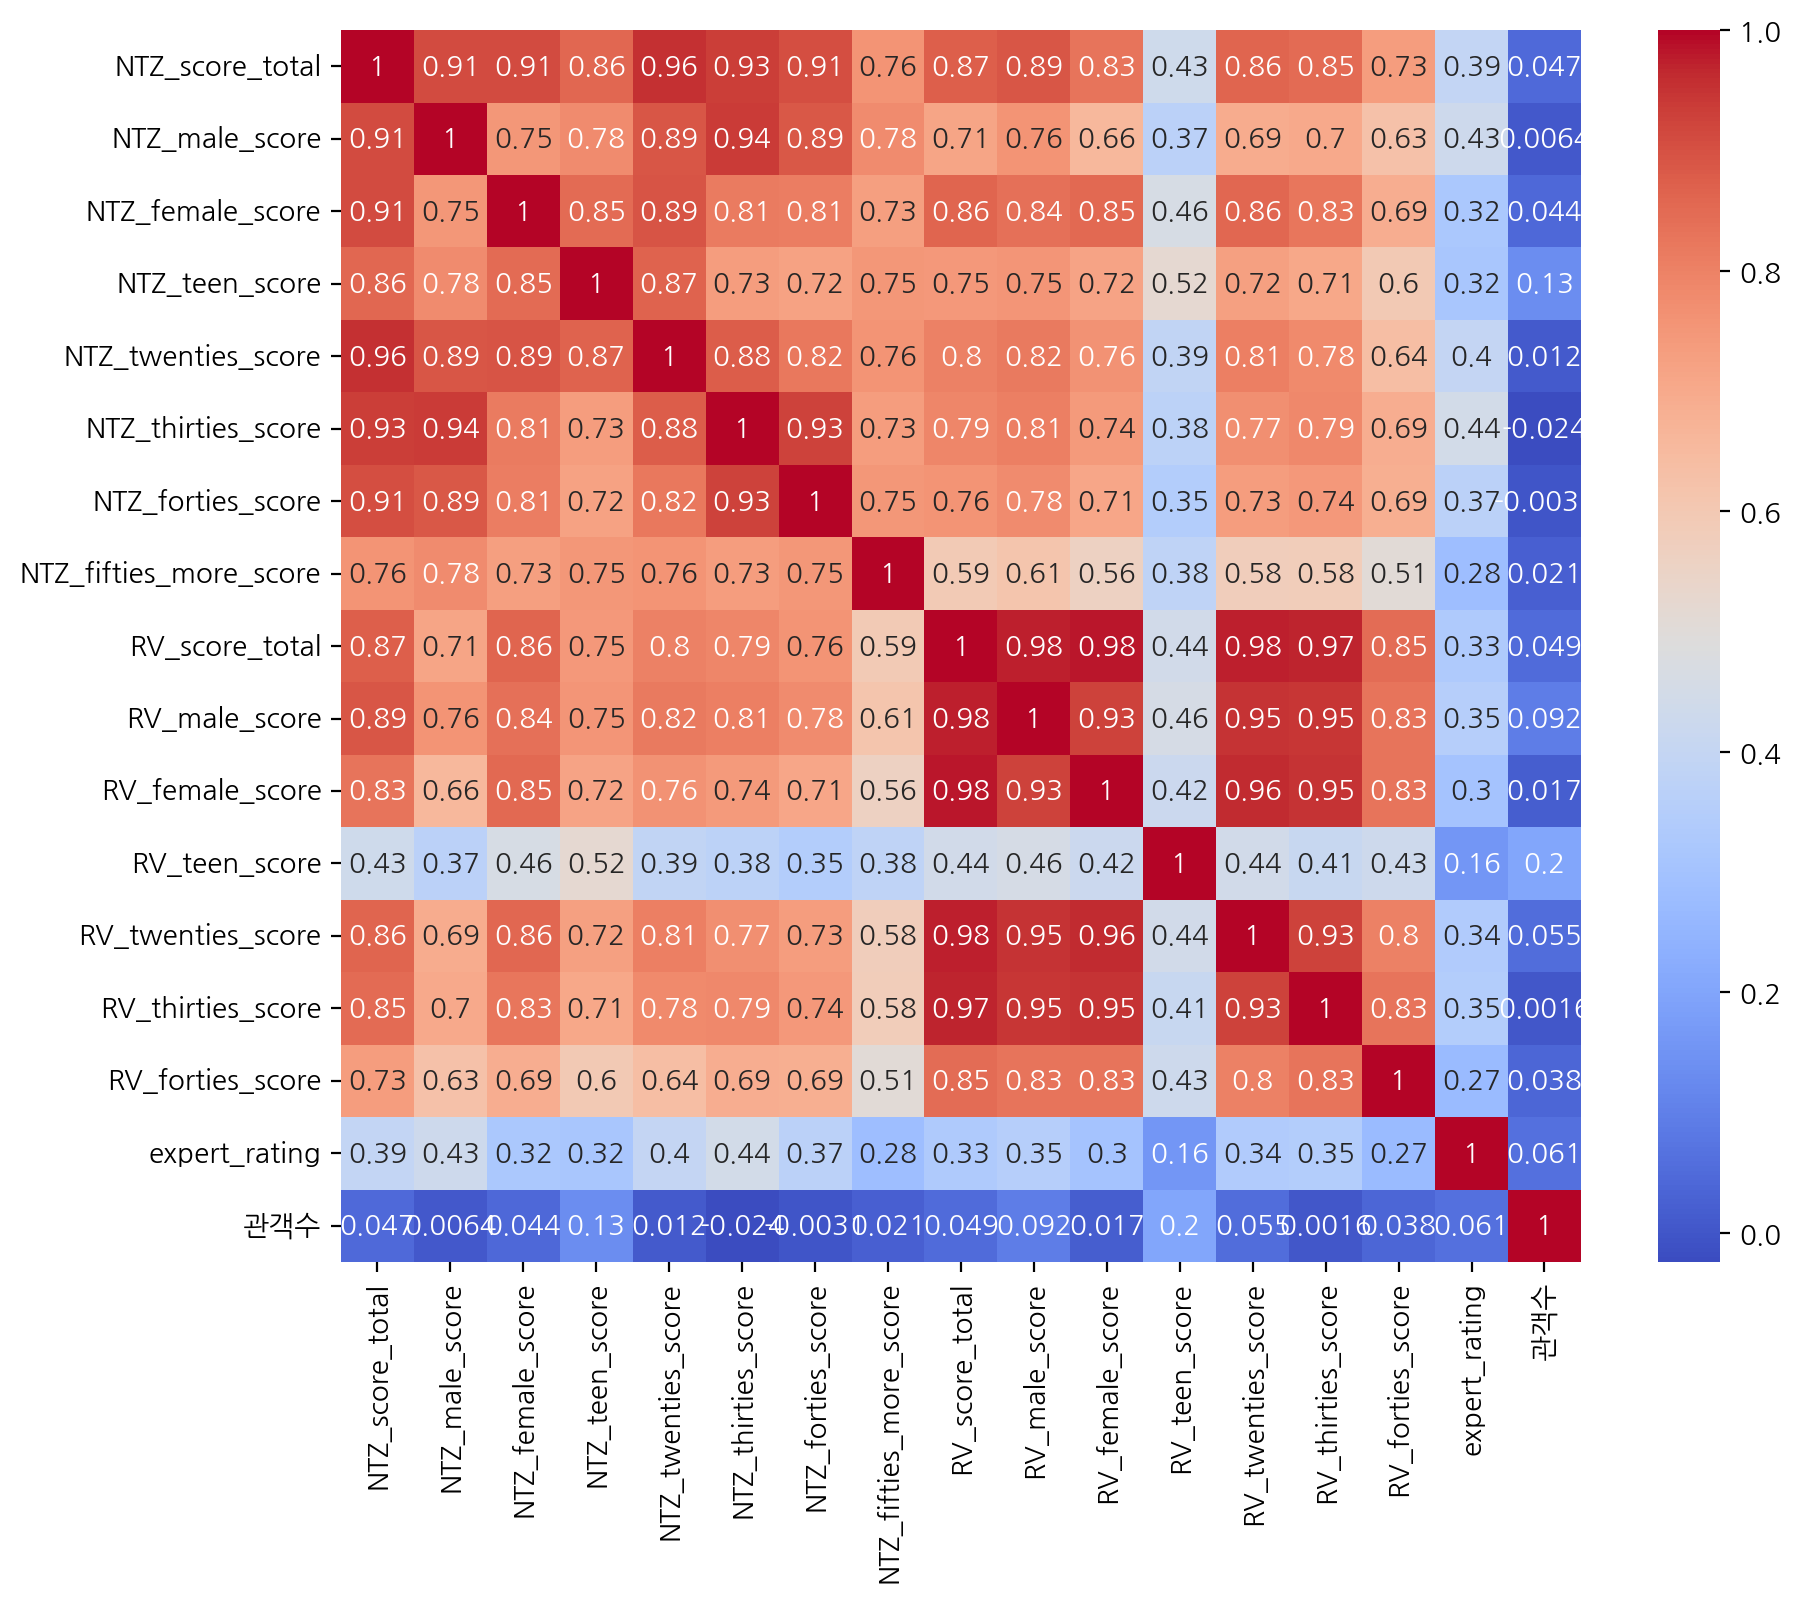

In [33]:
# 관객수에 대해 log scaling
grouped_df['관객수'] = np.log1p(grouped_df['관객수'])
# corr() 함수를 사용하여 상관관계 분석
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(grouped_df.corr(),annot=True, cmap='coolwarm')


* 실관람객 평점 vs 전문가 평점
* 네티즌 평점 vs 전문가 평점 

Text(0.5, 1.0, '관객수와 전문가 평점의 관계')

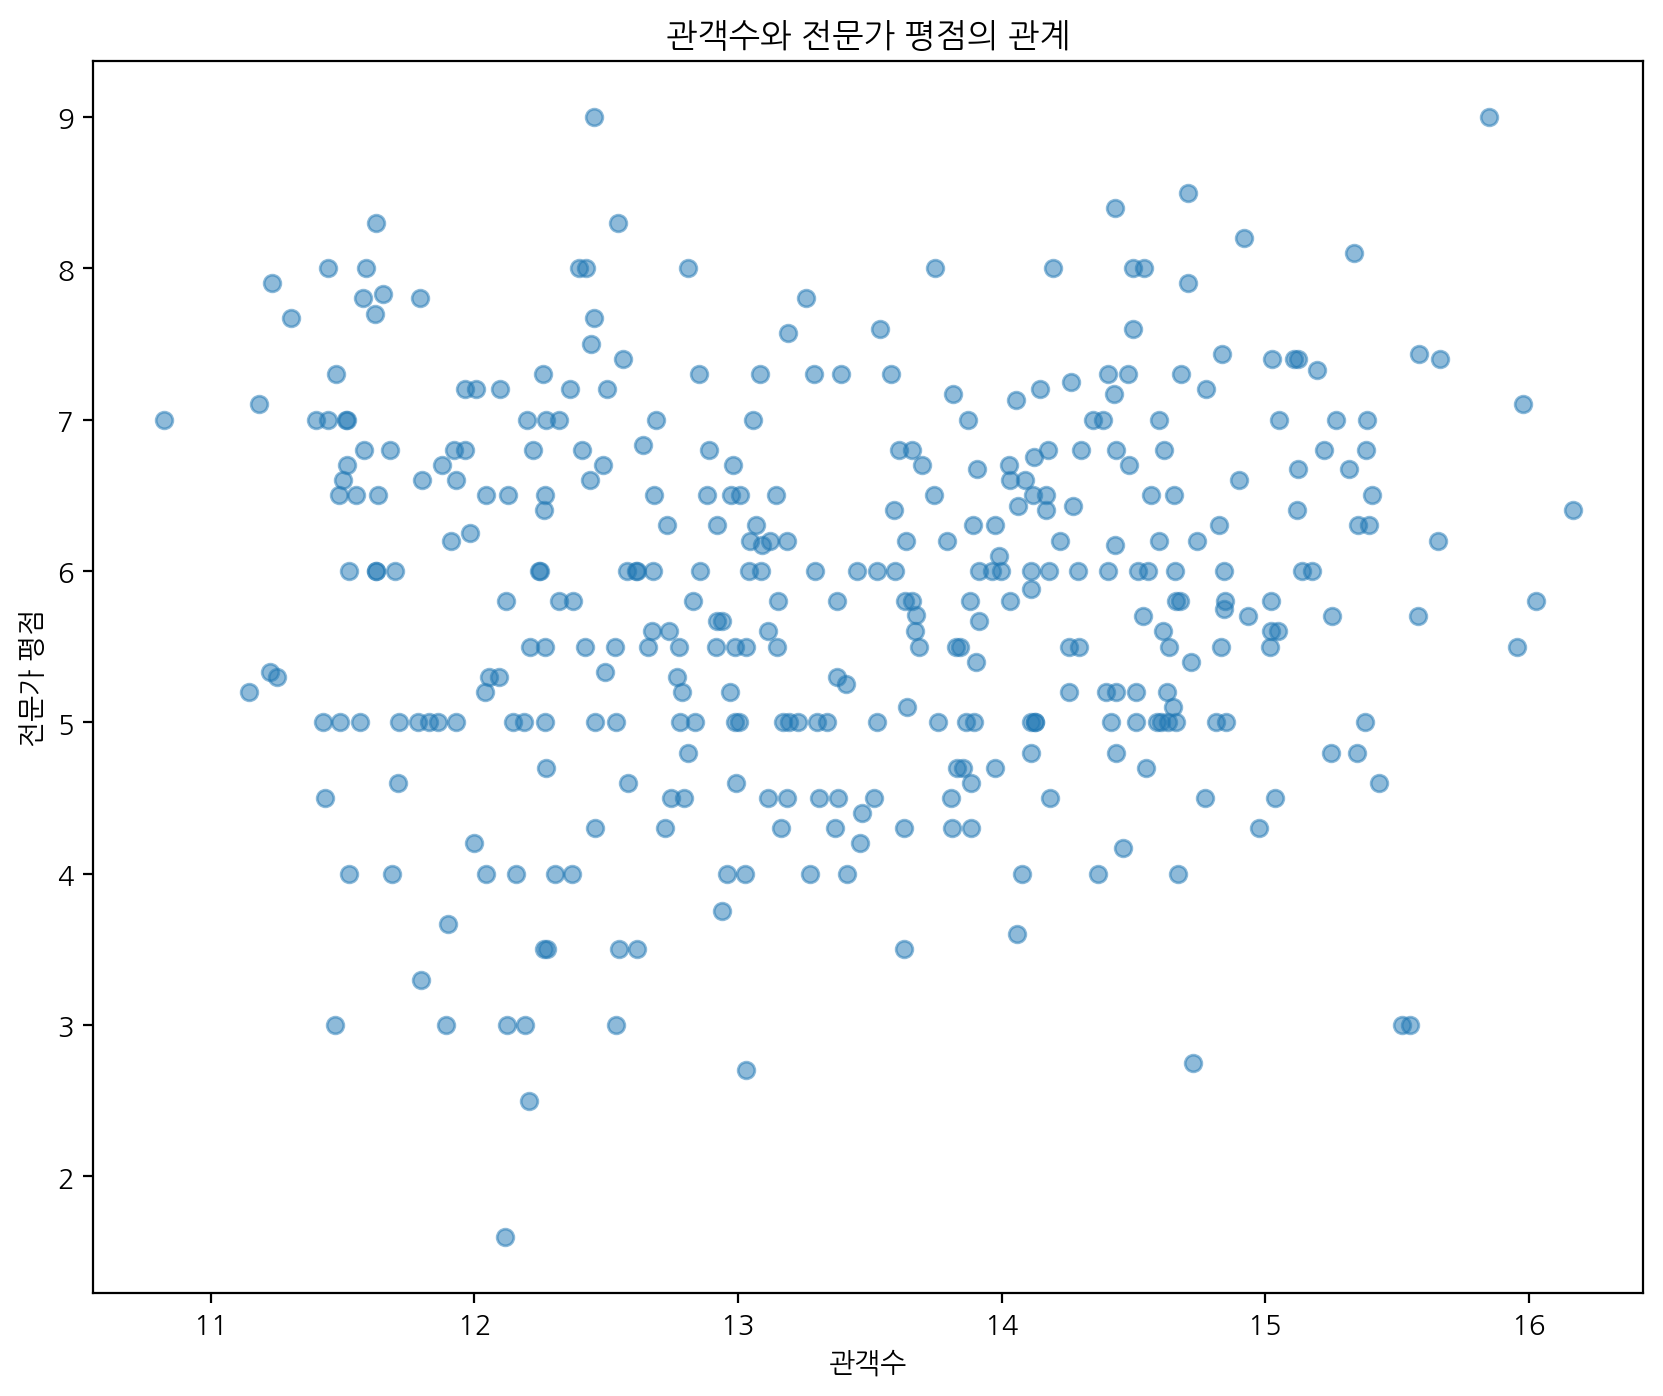

In [34]:
# 실관람객 평점과 전문가 평점으로 산점도 그리기
plt.figure(figsize=(10, 8))
plt.scatter(grouped_df['관객수'], grouped_df['expert_rating'], alpha=0.5)
plt.xlabel('관객수')
plt.ylabel('전문가 평점')
plt.title('관객수와 전문가 평점의 관계')

Text(0.5, 1.0, '관객수와 실관람객_평점의 관계')

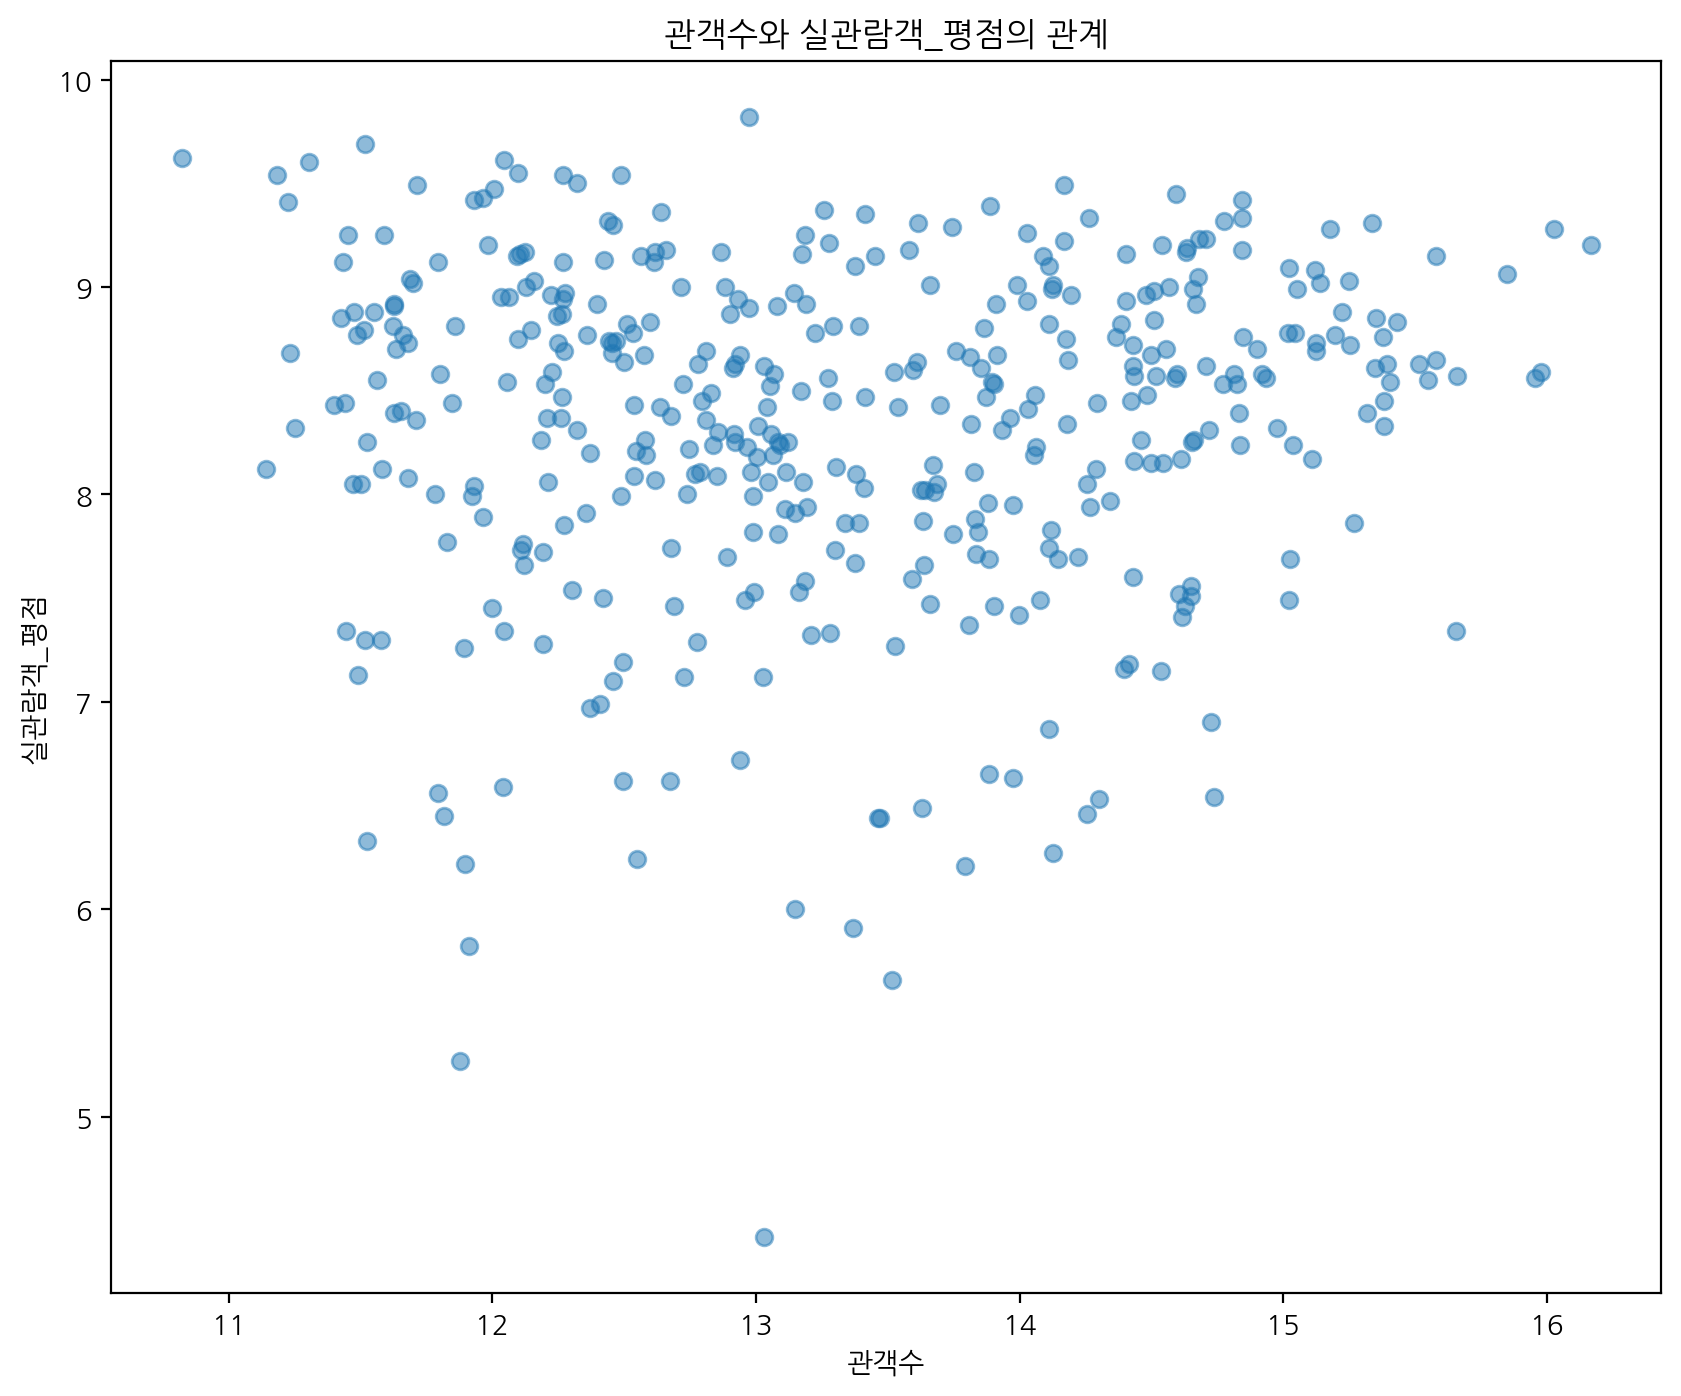

In [35]:
# 실관람객 평점과 전문가 평점으로 산점도 그리기
plt.figure(figsize=(10, 8))
plt.scatter(grouped_df['관객수'], grouped_df['RV_score_total'], alpha=0.5)
plt.xlabel('관객수')
plt.ylabel('실관람객_평점')
plt.title('관객수와 실관람객_평점의 관계')

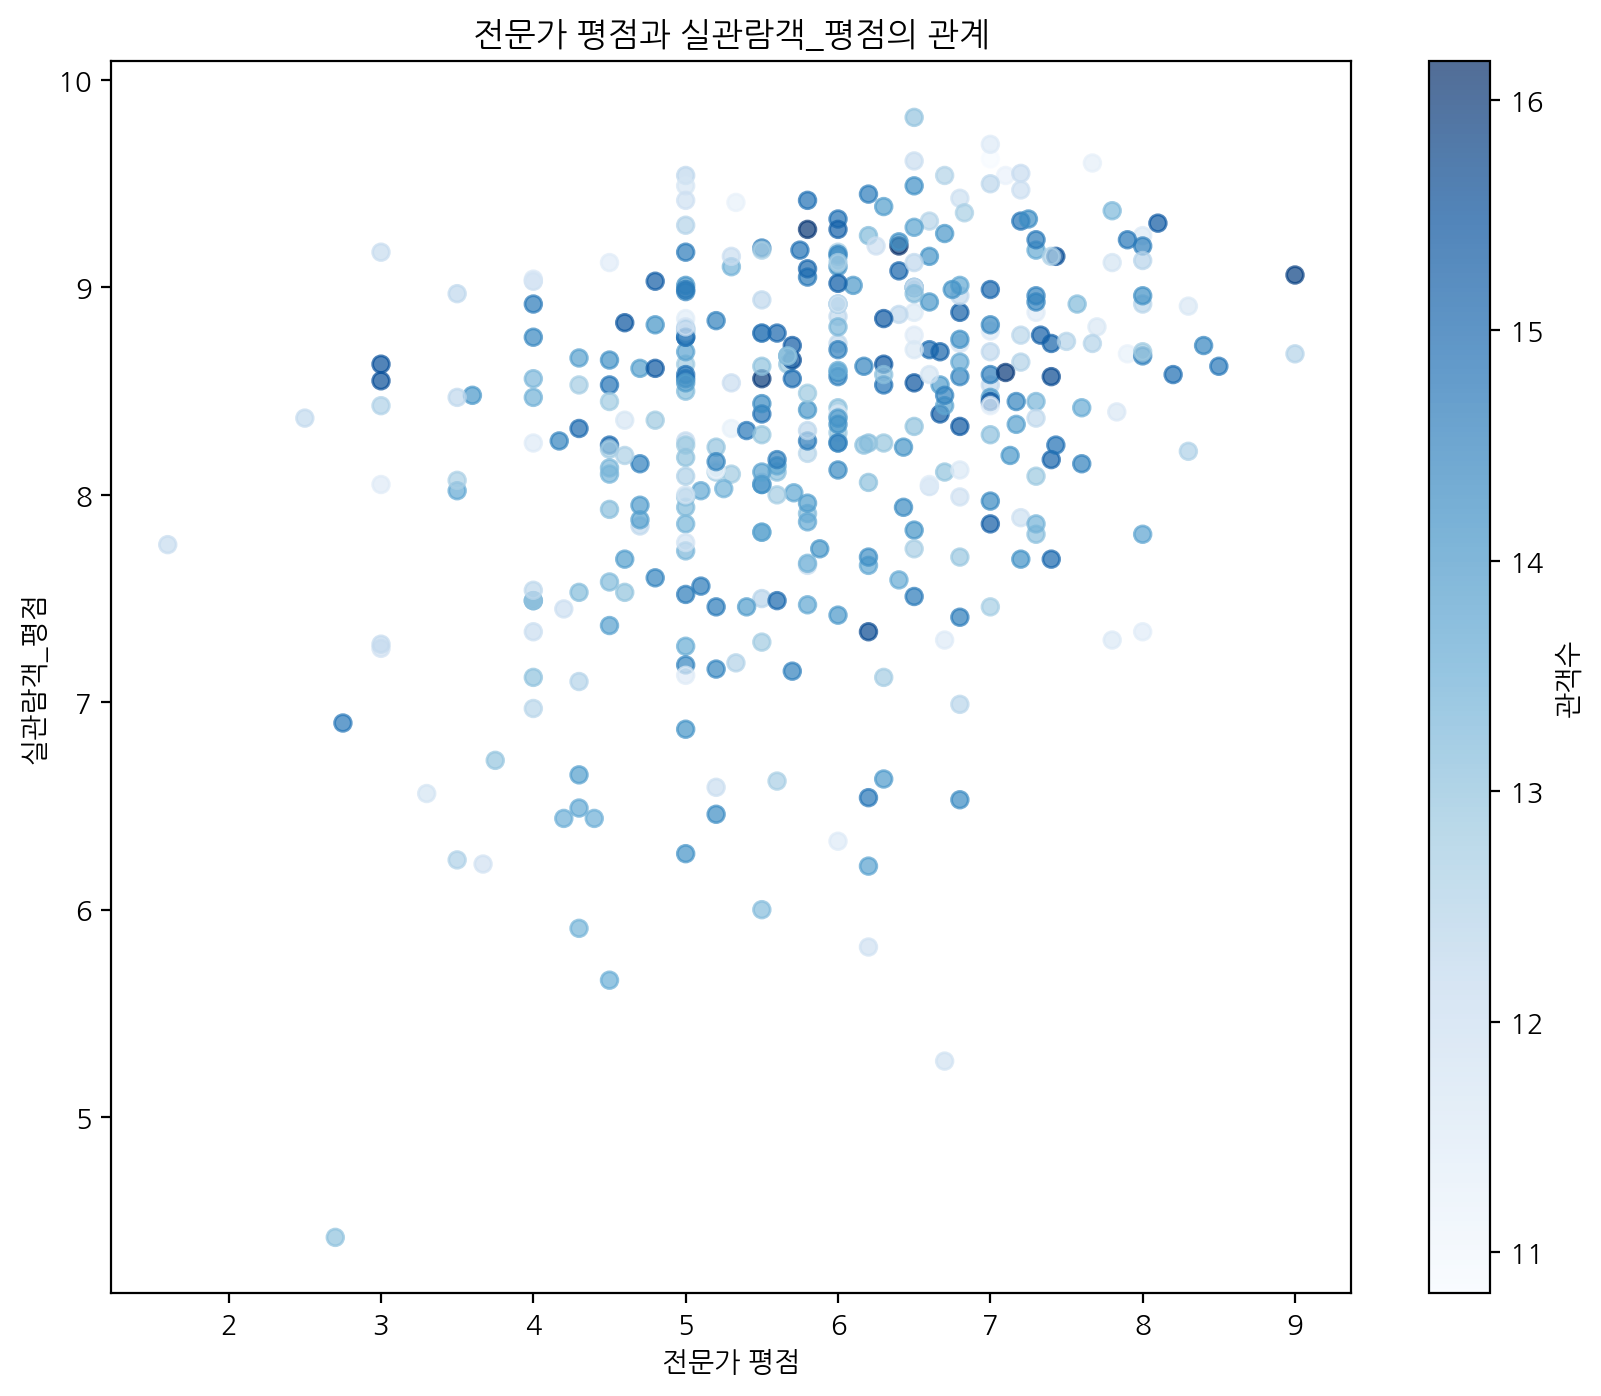

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# 관객수에 따라 색상 다르게 설정
scatter = plt.scatter(
    grouped_df['expert_rating'],  # x축: 전문가 평점
    grouped_df['RV_score_total'],  # y축: 실관람객 평점
    c=grouped_df['관객수'],  # 관객수 데이터를 색상으로 사용
    cmap='Blues',  # 색상 맵 선택 (e.g., 'viridis', 'plasma', 'coolwarm')
    alpha=0.7  # 투명도 설정
)

plt.xlabel('전문가 평점')
plt.ylabel('실관람객_평점')
plt.title('전문가 평점과 실관람객_평점의 관계')

# 색상 바 추가 (관객수에 따른 색상 범위 표시)
plt.colorbar(scatter, label='관객수')

plt.show()


#### 과연 실관람객_평점과 전문가 평점이 높으면 영화가 흥행을 하는가?

In [37]:
# 실관람객 사분위수로 나누기
grouped_df['RV_score_total_level'] = pd.qcut(grouped_df['RV_score_total'], q=4, labels=['0', '1', '2', '3'])
grouped_df['RV_score_total_level'].value_counts()   

# 전문가 평점 사분위수로 나누기
grouped_df['expert_rating_level'] = pd.qcut(grouped_df['expert_rating'], q=4, labels=['0', '1', '2', '3'])
grouped_df['expert_rating_level'].value_counts()


expert_rating_level
0    110
1    102
2     79
3     79
Name: count, dtype: int64

In [46]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0.0MHz to 히든 피겨스
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NTZ_score_total         409 non-null    float64 
 1   NTZ_male_score          409 non-null    float64 
 2   NTZ_female_score        409 non-null    float64 
 3   NTZ_teen_score          409 non-null    float64 
 4   NTZ_twenties_score      409 non-null    float64 
 5   NTZ_thirties_score      409 non-null    float64 
 6   NTZ_forties_score       409 non-null    float64 
 7   NTZ_fifties_more_score  409 non-null    float64 
 8   RV_score_total          409 non-null    float64 
 9   RV_male_score           409 non-null    float64 
 10  RV_female_score         409 non-null    float64 
 11  RV_teen_score           409 non-null    float64 
 12  RV_twenties_score       409 non-null    float64 
 13  RV_thirties_score       409 non-null    float64 
 14  RV_forties_score       

In [48]:
# 1. 실관람객_평점과 전문가 평점은 높지만, 흥행하지 못한 영화
# RV_score_total_level -> float형식으로 교체
# expert_rating_level -> float형식으로 교체
#grouped_df['RV_score_total_level'] = grouped_df['RV_score_total_level'].astype(float)
#grouped_df['expert_rating_level'] = grouped_df['expert_rating_level'].astype(float)
grouped_df[(grouped_df['RV_score_total_level'] >= 3) & (grouped_df['expert_rating_level'] >= 3)]

,NTZ_score_total,NTZ_male_score,NTZ_female_score,NTZ_teen_score,NTZ_twenties_score,NTZ_thirties_score,NTZ_forties_score,NTZ_fifties_more_score,RV_score_total,RV_male_score,RV_female_score,RV_teen_score,RV_twenties_score,RV_thirties_score,RV_forties_score,expert_rating,관객수,RV_score_total_level,expert_rating_level
movie_title,,,,,,,,,,,,,,,,,,,
1987,9.22,8.90,9.62,9.58,9.20,9.09,9.29,8.82,9.31,9.25,9.37,9.43,9.28,9.30,9.39,8.10,15.336438,3.0,3.0
가버나움,9.59,9.33,9.87,9.80,9.69,9.68,9.62,9.54,9.54,9.39,9.61,9.55,9.56,9.51,9.58,7.10,11.181918,3.0,3.0
그린 북,9.61,9.56,9.79,9.63,9.70,9.70,9.59,9.48,9.55,9.52,9.56,9.60,9.51,9.58,9.53,7.20,12.096286,3.0,3.0
기생충,8.47,8.10,8.58,9.05,8.63,8.23,7.85,7.56,9.06,9.14,8.99,9.21,9.21,9.04,8.84,9.00,15.849838,3.0,3.0
나의 소녀시대,8.82,8.31,9.15,9.50,8.70,8.43,8.72,8.61,9.50,9.00,9.75,0.00,8.50,10.00,10.00,7.00,12.322401,3.0,3.0
당갈,9.44,9.00,9.84,9.04,9.62,9.38,9.30,9.34,9.62,9.27,9.73,9.65,9.79,9.50,8.85,7.00,10.821956,3.0,3.0
동주,9.37,9.09,9.72,9.73,9.55,9.30,9.22,8.97,9.18,9.06,9.25,9.55,9.23,9.14,9.00,7.30,13.579225,3.0,3.0
로건,9.06,9.13,9.39,9.72,9.39,9.04,8.79,9.18,8.93,9.01,8.77,8.97,9.09,8.82,8.45,7.30,14.403458,3.0,3.0
미녀와 야수,8.78,8.03,8.84,9.36,8.51,8.04,8.20,8.27,8.99,8.99,8.98,9.30,9.06,8.90,8.85,7.00,15.051812,3.0,3.0
